In [ ]:
%matplotlib inline

import os
import pickle
import requests
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import preprocessing, tree
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report
from scipy import cluster
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
pd.options.mode.chained_assignment = None

In [ ]:
# Name our columns after analysis data-sheet from dataset source

names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [ ]:
data = pd.read_csv('drug_consumption.data', header = None, names = names)

In [ ]:
# Observe top 10 observations

data.head(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Alcohol,Amphetamine,Amyl_nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,0,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,3,1,7,6,6,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,2,1,1,5,6,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,2,0,5,1,6,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,4,1,7,5,6,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Observe last 10 observations

data.tail(10)

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Alcohol,Amphetamine,Amyl_nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
1875,1879,-0.95197,-0.48246,-0.61113,-0.57009,0.12600,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,1.29221,1.22470,CL5,CL0,CL0,CL0,CL5,CL5,CL4,CL0,CL0,CL5,CL0,CL0,CL2,CL4,CL0,CL4,CL6,CL0,CL2
1876,1880,-0.07854,-0.48246,-0.61113,0.24923,0.11440,-0.14882,-0.57545,1.43533,-0.91699,-0.78155,0.52975,0.40148,CL6,CL0,CL0,CL0,CL5,CL6,CL5,CL4,CL0,CL3,CL0,CL3,CL5,CL3,CL0,CL4,CL2,CL0,CL2
1877,1881,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,1.49158,-1.92173,-0.58331,-1.77200,0.58489,-0.21712,1.22470,CL6,CL2,CL0,CL6,CL6,CL5,CL5,CL3,CL0,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1878,1882,-0.95197,-0.48246,0.45468,0.24923,-0.31685,-0.05188,-1.76250,0.88309,-0.76096,2.33337,-0.71126,-0.21575,CL4,CL0,CL0,CL0,CL2,CL5,CL5,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,CL2,CL2,CL0,CL0
1879,1883,-0.95197,-0.48246,-0.61113,-0.28519,-0.31685,-0.79151,0.32197,0.29338,-0.30172,-0.27607,0.88113,0.76540,CL4,CL3,CL0,CL3,CL5,CL6,CL5,CL0,CL0,CL5,CL2,CL0,CL4,CL5,CL4,CL0,CL6,CL0,CL1
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,0.88113,1.22470,CL4,CL3,CL0,CL3,CL6,CL3,CL6,CL3,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [ ]:
data.shape

(1885, 32)

In [ ]:
# Count number of NaN's in every column

print(data.isna().sum())

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Alcohol              0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Caffeine             0
Cannabis             0
Chocolate            0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64


In [ ]:
# Create a variable containing all the columns/features names

data_columns = data.columns

print(data_columns)

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol',
       'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis',
       'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron',
       'VSA'],
      dtype='object')


In [ ]:
# Count number of unique values in every column

data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'Age': 6,
 'Agreeableness': 41,
 'Alcohol': 7,
 'Amphetamine': 7,
 'Amyl_nitrite': 7,
 'Benzodiazepine': 7,
 'Caffeine': 7,
 'Cannabis': 7,
 'Chocolate': 7,
 'Cocaine': 7,
 'Conscientiousness': 41,
 'Country': 7,
 'Crack': 7,
 'Ecstasy': 7,
 'Education': 9,
 'Ethnicity': 7,
 'Extraversion': 42,
 'Gender': 2,
 'Heroin': 7,
 'ID': 1885,
 'Impulsiveness': 10,
 'Ketamine': 7,
 'LSD': 7,
 'Legal_highs': 7,
 'Methadone': 7,
 'Mushrooms': 7,
 'Neuroticism': 49,
 'Nicotine': 7,
 'Openness': 35,
 'Semeron': 5,
 'Sensation_seeking': 11,
 'VSA': 7}

In [ ]:
# Display basic data statistics

data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
# set data index

data.set_index('ID', inplace = True)


In [ ]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Alcohol,Amphetamine,Amyl_nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
# Creating rough version of classification of drug consumption. Modifing my existing `data` object:
# 1 - if a person used a drug in month, week or day, then let's say that he did consume a drug.

# 0 - other categories are placed into the group that he did not consume a drug; 

def change(a):
    
    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') ):
        a = 1
    
    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') or (a == 'CL3')):
        a = 0
    
    return a

In [ ]:
# Applying our changes in classification of drug consumption to columns with drugs

data['Amphetamine'] = data['Amphetamine'].map(change)

data['Amyl_nitrite'] = data['Amyl_nitrite'].map(change)

data['Benzodiazepine'] = data['Benzodiazepine'].map(change)

data['Cannabis'] = data['Cannabis'].map(change)

data['Cocaine'] = data['Cocaine'].map(change)

data['Crack'] = data['Crack'].map(change)

data['Ecstasy'] = data['Ecstasy'].map(change)

data['Heroin'] = data['Heroin'].map(change)

data['Ketamine'] = data['Ketamine'].map(change)

data['LSD'] = data['LSD'].map(change)

data['Methadone'] = data['Methadone'].map(change)

data['Mushrooms'] = data['Mushrooms'].map(change)

data['Semeron'] = data['Semeron'].map(change)

data['VSA'] = data['VSA'].map(change)

data['Alcohol'] = data['Alcohol'].map(change)

data['Legal_highs'] = data['Legal_highs'].map(change)

data['Nicotine'] = data['Nicotine'].map(change)

data['Chocolate'] = data['Chocolate'].map(change)

data['Caffeine'] = data['Caffeine'].map(change)

In [ ]:
#There is a problem with float64 values in dataset. I converted values to  .f5
#Because if you see the number 0.86054, for example, then its not what it is actually.
#It can be 0.8605400000001. That's why the comparison does not work

def toFixed(x):
    x = float('{:.5f}'.format(x))
    return x

for i in list(data.columns):
    data[i] = data[i].map(toFixed)

In [ ]:
#Decode column Age 

#'18-24' age -> 0
#'25-34' age -> 1
#'35-44' age -> 2
#'45-54' age -> 3
#'55-64' age -> 4
#'65+'   age -> 5

def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

data['Age'] = data['Age'].map(changeAge)

In [ ]:
#Decode Gender

# Female -> 0
# Male   -> 1

def changeGender(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

data['Gender'] = data['Gender'].map(changeGender)

In [ ]:
#Decode Education

# Left school before 16 years                          -> 0
# Left school at 16 years                              -> 1
# Left school at 17 years                              -> 2
# Left school at 18 years                              -> 3
# Some college or university, no certificate or degree -> 4
# Professional certificate/ diploma                    -> 5
# University degree                                    -> 6
# Masters degree                                       -> 7
# Doctorate degree                                     -> 8

def changeEducation(x):
  
  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x

data['Education'] = data['Education'].map(changeEducation)

In [ ]:
#Decode country

#Australia -> 0
#Canada    -> 1
#New Zealand->2
#Other     -> 3
#Republic of Ireland ->4
#UK         ->5
#USA        ->6

def changeCountry(x):
  
  if (x == -0.09765):
    x = 0
  elif (x == 0.24923):
    x = 1
  elif (x == -0.46841):
    x = 2
  elif (x == -0.28519):
    x = 3
  elif (x == 0.21128):
    x = 4
  elif (x == 0.96082):
    x = 5
  elif (x == -0.57009):
    x = 6
  return x

data['Country'] = data['Country'].map(changeCountry)

In [ ]:
#Decode Ethnicity

#Asian  -> 0
#Black  -> 1
#Mixed-Black/Asian -> 2
#Mixed-White/Asian -> 3
#Mixed-White/Black -> 4
#Other             -> 5
#White             -> 6

def changeEthnicity(x):
  
  if (x == -0.50212):
    x = 0
  elif (x == -1.10702):
    x = 1
  elif (x == 1.90725):
    x = 2
  elif (x == 0.12600):
    x = 3
  elif (x == -0.22166):
    x = 4
  elif (x == 0.11440):
    x = 5
  elif (x == -0.31685):
    x = 6
  return x

data['Ethnicity'] = data['Ethnicity'].map(changeEthnicity)

In [ ]:
data.tail()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Alcohol,Amphetamine,Amyl_nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1884,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1885,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1886,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1887,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1888,0,1,4,4,6,-0.46725,2.12700,1.65653,1.11406,0.41594,0.88113,1.22470,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Count number of unique values in every column again
# to compare whether we missed something

data_nunique_dict1 = data.nunique().to_dict()
data_nunique_dict1

{'Age': 6,
 'Agreeableness': 41,
 'Alcohol': 2,
 'Amphetamine': 2,
 'Amyl_nitrite': 2,
 'Benzodiazepine': 2,
 'Caffeine': 2,
 'Cannabis': 2,
 'Chocolate': 2,
 'Cocaine': 2,
 'Conscientiousness': 41,
 'Country': 7,
 'Crack': 2,
 'Ecstasy': 2,
 'Education': 9,
 'Ethnicity': 7,
 'Extraversion': 42,
 'Gender': 2,
 'Heroin': 2,
 'Impulsiveness': 10,
 'Ketamine': 2,
 'LSD': 2,
 'Legal_highs': 2,
 'Methadone': 2,
 'Mushrooms': 2,
 'Neuroticism': 49,
 'Nicotine': 2,
 'Openness': 35,
 'Semeron': 2,
 'Sensation_seeking': 11,
 'VSA': 2}

In [ ]:
data["Age"] = data['Age'].astype('int')
data["Education"] = data['Education'].astype('int')
data["Country"] = data['Country'].astype('int')
data["Ethnicity"] = data['Ethnicity'].astype('int')
data["Alcohol"] = data['Alcohol'].astype('int')

In [ ]:
for i in range(12,31):
    data[data.columns[i]] = data[data.columns[i]].astype('int')

[Text(0, 0, '0'),
 Text(0, 0, '18'),
 Text(0, 0, '24'),
 Text(0, 0, '35'),
 Text(0, 0, '45'),
 Text(0, 0, '55'),
 Text(0, 0, '65+')]

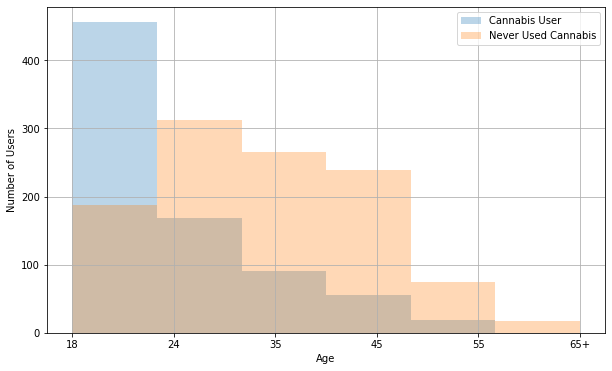

In [ ]:
# Observing drug consumption rate over Age

age = pd.concat([data[data['Cannabis']==1]['Age'],data[data['Cannabis']==0]['Age']],axis=1)
age.columns=['Cannabis User','Never Used Cannabis']

AgePlot = age.plot(kind='hist',bins=6,figsize=(10,6),alpha=0.3,grid=True)
AgePlot.set(ylabel = 'Number of Users', xlabel='Age')

AgeLabels = ['0','18','24','35','45','55','65+']
AgePlot.set_xticklabels(AgeLabels)

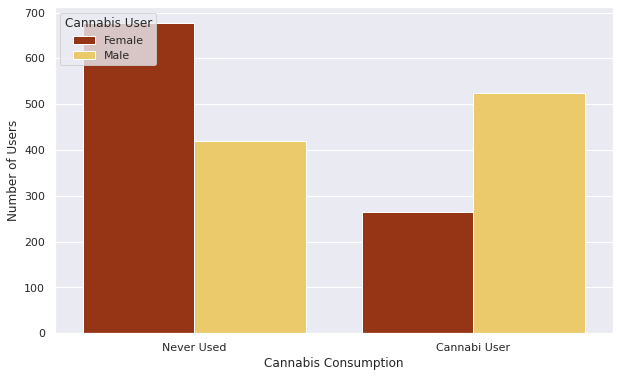

In [ ]:
# Observing drug consumption rate across Gender

sns.set(rc={'figure.figsize':(10,6)})
GenderPlot = sns.countplot(x='Cannabis',hue='Gender',data=data,palette='afmhot')

labels = ['Never Used', 'Cannabi User']
GenderPlot.set_xticklabels(labels)

GenderPlot.set(ylabel = 'Number of Users', xlabel='Cannabis Consumption')
plt.legend(title='Cannabis User', loc='upper left', labels=['Female', 'Male'])

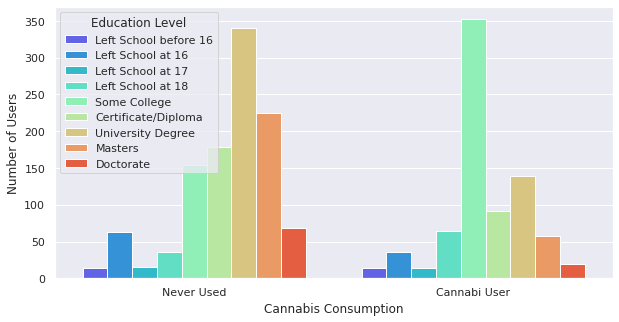

In [ ]:
# Analyzing drug consumption rate across Education Level
sns.set(rc={'figure.figsize':(10,5)})
x = ('yes','no')
EducationPlot = sns.countplot(x='Cannabis',hue='Education',data=data,palette='rainbow')

EducationPlot.set_xticklabels(labels)
EducationPlot.set(ylabel = 'Number of Users', xlabel='Cannabis Consumption')

plt.legend(title='Education Level', loc='upper left', 
           labels=['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


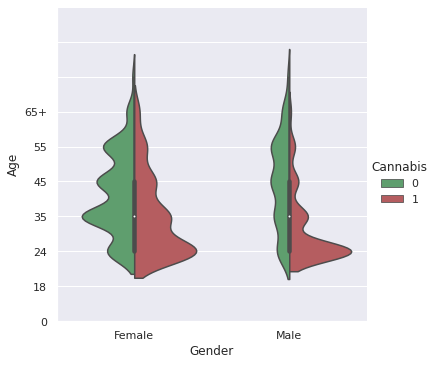

In [ ]:
# Analyzing drug consumption combining Age and Gender features
Age_Gender_Plot = sns.factorplot(x='Gender' , y='Age' , data=data , hue='Cannabis' , kind='violin' , palette=['g','r'] , split=True)

AgeLabels = ['0','18','24','35','45','55','65+']
Age_Gender_Plot.set_yticklabels(AgeLabels)

genderlabels = ['Female', 'Male']
Age_Gender_Plot.set_xticklabels(genderlabels)

[Text(0, 0, 'Left School before 16'),
 Text(0, 0, 'Left School at 16'),
 Text(0, 0, 'Left School at 17'),
 Text(0, 0, 'Left School at 18'),
 Text(0, 0, 'Some College'),
 Text(0, 0, 'Certificate/Diploma'),
 Text(0, 0, 'University Degree'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'Doctorate')]

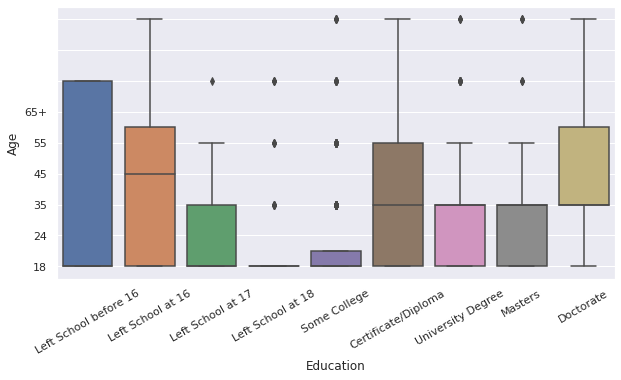

In [ ]:
# Combine Age and Education Level together
# Focus only on the actual cannabis users

datav2 = data[data['Cannabis'] == 1]
Age_Education_Plot = sns.boxplot(x='Education',y='Age',data=datav2)

AgeLabels = ['0','18','24','35','45','55','65+']
Age_Education_Plot.set_yticklabels(AgeLabels)

EducationLabels = ['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate']
Age_Education_Plot.set_xticklabels(EducationLabels,rotation=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

target = data["Cannabis"]

datav3 = data.drop(columns=["Cannabis","Alcohol","Amphetamine","Amyl_nitrite","Benzodiazepine","Caffeine","Cannabis","Chocolate","Cocaine","Crack","Ecstasy","Heroin","Ketamine","Legal_highs","LSD","Methadone","Mushrooms","Nicotine","Semeron","VSA"])
feature_names = datav3.columns

X_train, X_test, y_train, y_test = train_test_split(datav3, target, random_state=1, stratify=target)
X_train.head(2)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
ID,,,,,,,,,,,,
1470,0,0,6,5,6,0.31287,0.00332,-0.01928,0.76096,-0.27607,-1.37983,-1.18084
346,2,0,7,5,6,-1.86962,0.16767,1.43533,1.81866,1.13407,-0.71126,-0.84637


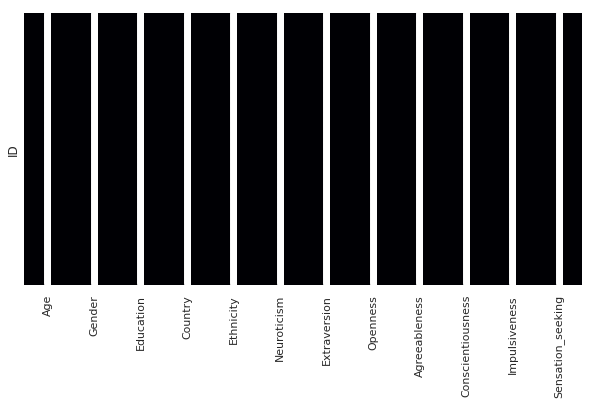

In [ ]:
# Use a heatmap quickly check if there is any NULL values within any of the features
# all shaded ==> all the cells have validate data; otherwise will be hilighted in yellow
sns.heatmap(X_train.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [ ]:
X_train.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,1.339703,0.502477,4.979476,4.829441,5.759377,0.018515,-0.002411,0.005086,-0.006270,0.013407,-0.003189,-0.001720
std,1.279314,0.500171,1.756091,1.416689,0.961065,0.986685,0.988660,1.003255,1.004389,0.999393,0.937731,0.949808
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.464360,-3.005370,-3.273930,-3.157350,-3.464360,-2.555240,-2.078480
25%,0.000000,0.000000,4.000000,5.000000,6.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,1.000000,1.000000,5.000000,5.000000,6.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,2.000000,1.000000,6.000000,6.000000,6.000000,0.629670,0.637790,0.723300,0.590420,0.758300,0.529750,0.765400
max,5.000000,1.000000,8.000000,6.000000,6.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model.feature_importances_

array([0.16102369, 0.04088814, 0.0687362 , 0.33160607, 0.00569053,
       0.03635184, 0.0392826 , 0.10747057, 0.02851622, 0.04739131,
       0.01981763, 0.11322521])

In [ ]:
FI=pd.DataFrame({'importance':model.feature_importances_},index=X_train.columns)
FI.sort_values('importance',ascending=False)

,importance
Country,0.331606
Age,0.161024
Sensation_seeking,0.113225
Openness,0.107471
Education,0.068736
Conscientiousness,0.047391
Gender,0.040888
Extraversion,0.039283
Neuroticism,0.036352
Agreeableness,0.028516


Text(0.5, 1.0, 'Feature Importance')

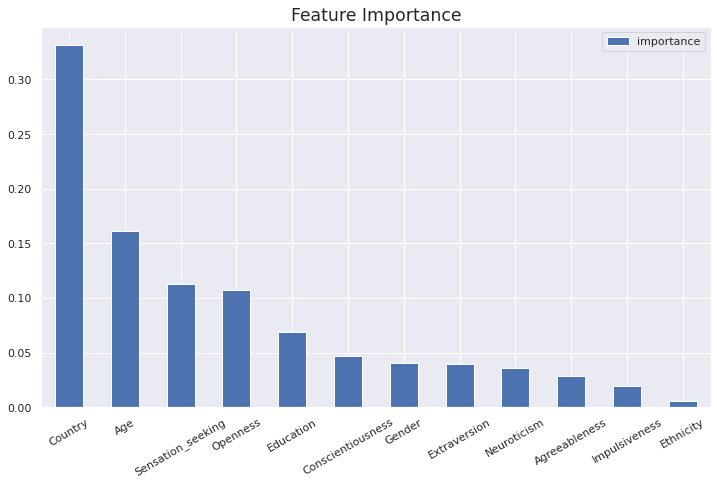

In [ ]:
FI.sort_values('importance',ascending=False).plot.bar(figsize=(12,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

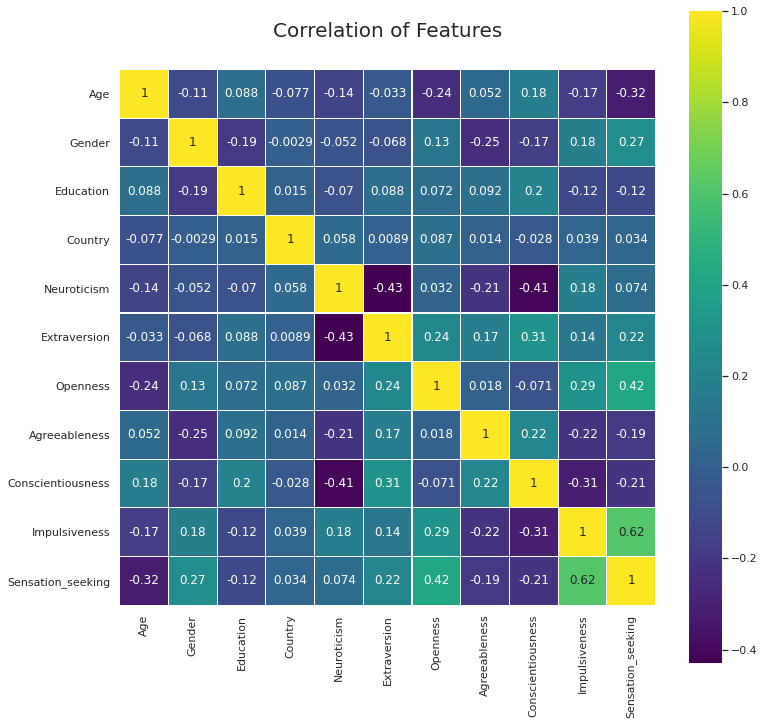

In [ ]:
# Draw a Correlation heatmap for all the features
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train[['Age', 'Gender', 'Education', 'Country',
          'Neuroticism', 'Extraversion', 
          'Openness', 'Agreeableness',
          'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

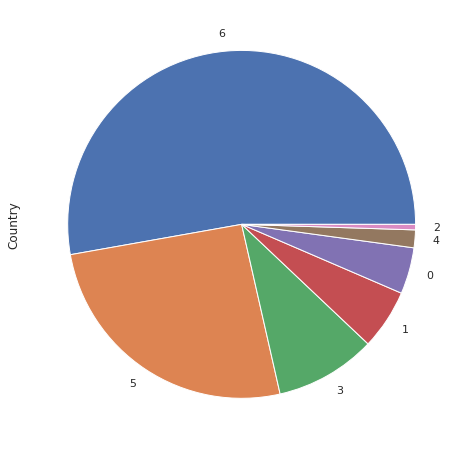

In [ ]:
countries = datav2['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

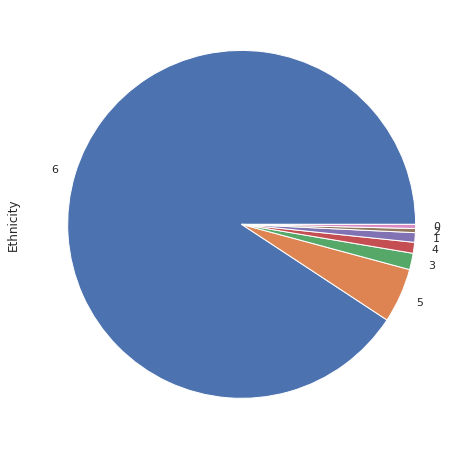

In [ ]:
ethnicity = datav2['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

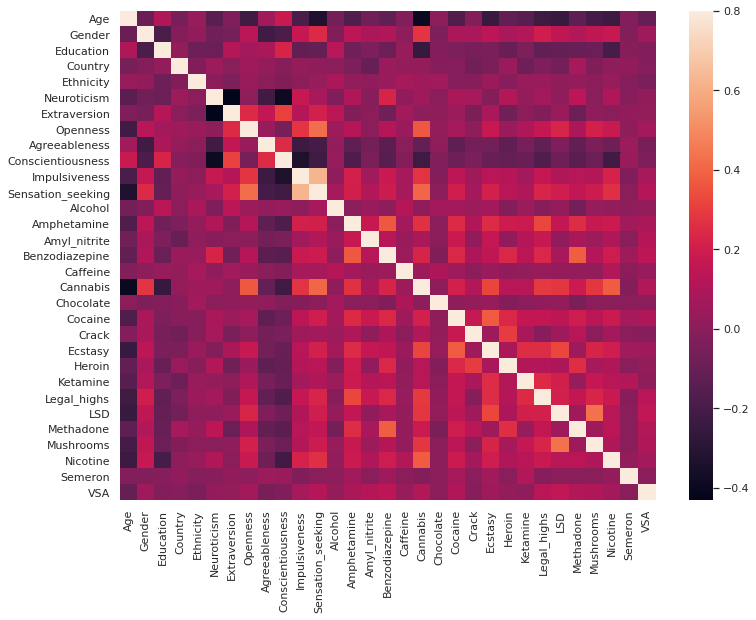

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=False);

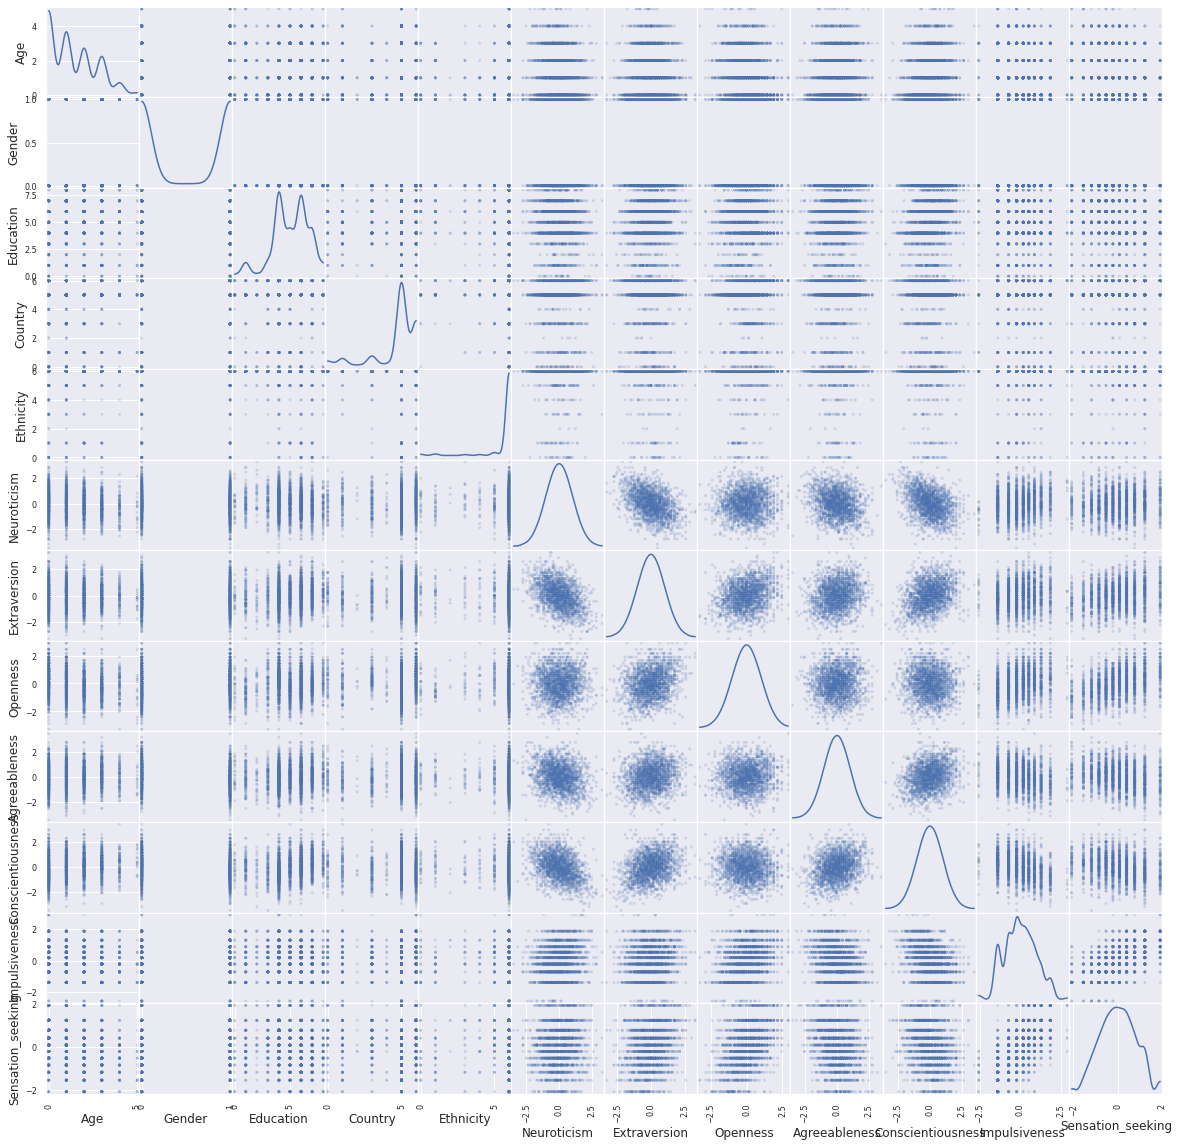

In [ ]:
scatter_matrix(datav3, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

In [ ]:
datav4 = pd.read_csv('drug_consumption.data', header = None, names = names)
datav4['Cannabis'] = datav4['Cannabis'].map(change)
datav4['Cannabis'].value_counts()

0    1097
1     788
Name: Cannabis, dtype: int64

In [ ]:
# Because sample size of individuals who have not used cannabis is significantly smaller than sample size of cannabis users
# upsampling is performed to make the sample sizes equal

from sklearn.utils import resample

data_majority = datav4[datav4['Cannabis']==0]
data_minority = datav4[datav4['Cannabis']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=1097, # same number of samples as majority classe
random_state=1) # set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Assign data the data_upsampled df
datav4 = data_upsampled
datav4['Cannabis'].value_counts()

1    1097
0    1097
Name: Cannabis, dtype: int64

In [ ]:
# Check for nulls
datav4.isnull().sum().head()

ID           0
Age          0
Gender       0
Education    0
Country      0
dtype: int64

In [ ]:
# Prepare dfs for train test split
from sklearn.model_selection import train_test_split

target = datav4["Cannabis"]
datav4 = datav4.drop(columns=["ID","Cannabis","Alcohol","Amphetamine","Amyl_nitrite","Benzodiazepine","Caffeine","Cannabis","Chocolate","Cocaine","Crack","Ecstasy","Heroin","Ketamine","Legal_highs","LSD","Methadone","Mushrooms","Nicotine","Semeron","VSA"])


datav4.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858


In [ ]:
from sklearn.preprocessing import OneHotEncoder

columnsToEncode = ['Age', 'Gender', 'Education','Country', 'Ethnicity', 'Neuroticism', 'Extraversion',
            'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']
data_reindex = datav4.reset_index(drop=True)


def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

one_hot_data = one_hot(data_reindex, columnsToEncode)
one_hot_data = one_hot_data.drop(columns=['Age', 'Gender', 'Education','Country', 'Ethnicity', 'Neuroticism', 'Extraversion',
            'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking'])
one_hot_data.head()

,Age_-0.9519700000000001,Age_-0.07854,Age_0.49788000000000004,Age_1.09449,Age_1.82213,Age_2.59171,Gender_-0.48246000000000006,Gender_0.48246000000000006,Education_-2.43591,Education_-1.7379,Education_-1.43719,Education_-1.22751,Education_-0.6111300000000001,Education_-0.059210000000000006,Education_0.45468000000000003,Education_1.16365,Education_1.98437,Country_-0.57009,Country_-0.46841000000000005,Country_-0.28519,Country_-0.09765,Country_0.21128000000000002,Country_0.24923,Country_0.9608200000000001,Ethnicity_-1.1070200000000001,Ethnicity_-0.50212,Ethnicity_-0.31685,Ethnicity_-0.22166,Ethnicity_0.1144,Ethnicity_0.126,Ethnicity_1.90725,Neuroticism_-3.4643599999999997,Neuroticism_-3.15735,Neuroticism_-2.75696,Neuroticism_-2.52197,Neuroticism_-2.4231700000000003,Neuroticism_-2.3436,Neuroticism_-2.21844,Neuroticism_-2.05048,Neuroticism_-1.86962,...,Conscientiousness_-0.27607,Conscientiousness_-0.14277,Conscientiousness_-0.00665,Conscientiousness_0.12330999999999999,Conscientiousness_0.25953000000000004,Conscientiousness_0.41594,Conscientiousness_0.5848899999999999,Conscientiousness_0.7583,Conscientiousness_0.9394899999999999,Conscientiousness_1.1340700000000001,Conscientiousness_1.3061200000000002,Conscientiousness_1.46191,Conscientiousness_1.6308799999999999,Conscientiousness_1.81175,Conscientiousness_2.04506,Conscientiousness_2.33337,Conscientiousness_2.63199,Conscientiousness_3.00537,Conscientiousness_3.4643599999999997,Impulsiveness_-2.55524,Impulsiveness_-1.37983,Impulsiveness_-0.71126,Impulsiveness_-0.21711999999999998,Impulsiveness_0.19268,Impulsiveness_0.52975,Impulsiveness_0.88113,Impulsiveness_1.29221,Impulsiveness_1.8620299999999999,Impulsiveness_2.90161,Sensation_seeking_-2.07848,Sensation_seeking_-1.5485799999999998,Sensation_seeking_-1.18084,Sensation_seeking_-0.8463700000000001,Sensation_seeking_-0.52593,Sensation_seeking_-0.21575,Sensation_seeking_0.07987000000000001,Sensation_seeking_0.40148,Sensation_seeking_0.7654,Sensation_seeking_1.2247,Sensation_seeking_1.92173
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Train split data
X_train, X_test, y_train, y_test = train_test_split(one_hot_data, target, random_state=1, stratify=target)

In [ ]:
X_train.head()

,Age_-0.9519700000000001,Age_-0.07854,Age_0.49788000000000004,Age_1.09449,Age_1.82213,Age_2.59171,Gender_-0.48246000000000006,Gender_0.48246000000000006,Education_-2.43591,Education_-1.7379,Education_-1.43719,Education_-1.22751,Education_-0.6111300000000001,Education_-0.059210000000000006,Education_0.45468000000000003,Education_1.16365,Education_1.98437,Country_-0.57009,Country_-0.46841000000000005,Country_-0.28519,Country_-0.09765,Country_0.21128000000000002,Country_0.24923,Country_0.9608200000000001,Ethnicity_-1.1070200000000001,Ethnicity_-0.50212,Ethnicity_-0.31685,Ethnicity_-0.22166,Ethnicity_0.1144,Ethnicity_0.126,Ethnicity_1.90725,Neuroticism_-3.4643599999999997,Neuroticism_-3.15735,Neuroticism_-2.75696,Neuroticism_-2.52197,Neuroticism_-2.4231700000000003,Neuroticism_-2.3436,Neuroticism_-2.21844,Neuroticism_-2.05048,Neuroticism_-1.86962,...,Conscientiousness_-0.27607,Conscientiousness_-0.14277,Conscientiousness_-0.00665,Conscientiousness_0.12330999999999999,Conscientiousness_0.25953000000000004,Conscientiousness_0.41594,Conscientiousness_0.5848899999999999,Conscientiousness_0.7583,Conscientiousness_0.9394899999999999,Conscientiousness_1.1340700000000001,Conscientiousness_1.3061200000000002,Conscientiousness_1.46191,Conscientiousness_1.6308799999999999,Conscientiousness_1.81175,Conscientiousness_2.04506,Conscientiousness_2.33337,Conscientiousness_2.63199,Conscientiousness_3.00537,Conscientiousness_3.4643599999999997,Impulsiveness_-2.55524,Impulsiveness_-1.37983,Impulsiveness_-0.71126,Impulsiveness_-0.21711999999999998,Impulsiveness_0.19268,Impulsiveness_0.52975,Impulsiveness_0.88113,Impulsiveness_1.29221,Impulsiveness_1.8620299999999999,Impulsiveness_2.90161,Sensation_seeking_-2.07848,Sensation_seeking_-1.5485799999999998,Sensation_seeking_-1.18084,Sensation_seeking_-0.8463700000000001,Sensation_seeking_-0.52593,Sensation_seeking_-0.21575,Sensation_seeking_0.07987000000000001,Sensation_seeking_0.40148,Sensation_seeking_0.7654,Sensation_seeking_1.2247,Sensation_seeking_1.92173
1567,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
339,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1186,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2188,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1279,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
X_standard_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_standard_scaler.transform(X_train)
X_test_scaled = X_standard_scaler.transform(X_test)

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=1000000,solver='liblinear')

# Train the model
model_log.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {model_log.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_log.score(X_test_scaled, y_test)}")

Training Data Score: 0.8644376899696049
Testing Data Score: 0.7759562841530054


In [ ]:
# Create the GridSearchCV model for logistic regression
from sklearn.model_selection import GridSearchCV

logistic_param_grid = {"penalty": ['l1','l2'],
              "C": [0.001,0.01,0.1,1,10,100,1000],
                      }
logistic_grid = GridSearchCV(model_log, logistic_param_grid, verbose=3, cv=10)

In [ ]:
# Fit the model using the grid search estimator
logistic_grid.fit(X_train_scaled, y_train)

In [ ]:
# Print scores for Logistic Regression
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.8127753141167775


In [ ]:
# Decision tree model

clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")


Training Data Score: 1.0
Testing Data Score: 0.7923497267759563


(549,)

In [ ]:
# Create the GridSearchCV model for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params= {
      "criterion": ['gini','entropy']
}
grid_search_cv = GridSearchCV(clf, params, verbose=3, cv=10)

grid_search_cv.fit(X_train_scaled, y_train)

In [ ]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy'}
0.8243274205469326


In [ ]:
# Compare scores

# Print scores for decision tree
print("Decisiontree Scores")
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)
print("-------------------------")

# Print scores for logistic regression
print("LogisticRegression Scores")
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)
print("-------------------------")

Decisiontree Scores
{'criterion': 'entropy'}
0.8243274205469326
-------------------------
LogisticRegression Scores
{'C': 0.01, 'penalty': 'l2'}
0.8127753141167775
-------------------------


In [ ]:
target_names = ['Unlikely to Use', 'Will Use']
# Print classification report 

# Make predictions for Decisiontree
y_predict = clf.predict(X_test_scaled)
log_report = classification_report(y_test, y_predict,target_names=target_names)
print(log_report)

                 precision    recall  f1-score   support

Unlikely to Use       0.80      0.78      0.79       274
       Will Use       0.79      0.80      0.79       275

       accuracy                           0.79       549
      macro avg       0.79      0.79      0.79       549
   weighted avg       0.79      0.79      0.79       549



In [ ]:
# Make predictions for Logistic Regression
y_predict = model_log.predict(X_test_scaled)
log_report = classification_report(y_test, y_predict,target_names=target_names)
print(log_report)


                 precision    recall  f1-score   support

Unlikely to Use       0.78      0.76      0.77       274
       Will Use       0.77      0.79      0.78       275

       accuracy                           0.78       549
      macro avg       0.78      0.78      0.78       549
   weighted avg       0.78      0.78      0.78       549

